In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


# downloading dataset from kaggle

In [7]:
! kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

100% 262k/262k [00:00<00:00, 584kB/s]
100% 262k/262k [00:00<00:00, 584kB/s]


# extracting data from zipfile to desired format

In [8]:
import zipfile
zip_ref=zipfile.ZipFile('/content/credit-card-customer-churn-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# data preprocessing

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# one hot encoding

In [25]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# spliting the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
X_train_scaled

array([[0.556     , 0.14864865, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.552     , 0.14864865, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.524     , 0.39189189, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.644     , 0.36486486, 0.9       , ..., 0.        , 0.        ,
        0.        ],
       [0.626     , 0.28378378, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.826     , 0.32432432, 0.6       , ..., 1.        , 0.        ,
        1.        ]])

# importing necessary libraries to apply Neural Network

In [78]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np

In [79]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [82]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5487 - accuracy: 0.7386 - val_loss: 0.4970 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4814 - accuracy: 0.7972 - val_loss: 0.4806 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4682 - accuracy: 0.7978 - val_loss: 0.4713 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8003 - val_loss: 0.4616 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8027 - val_loss: 0.4526 - val_accuracy: 0.8087
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8094 - val_loss: 0.4460 - val_accuracy: 0.8131
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4375 - accuracy: 0.8114 - val_loss: 0.4426 - val_accuracy: 0.8138

In [83]:
model.layers[0 ].get_weights()

[array([[ 3.63245189e-01, -2.35195547e-01,  3.45643550e-01,
          2.04630390e-01,  3.07675213e-01,  1.21895269e-01,
          6.06819272e-01,  1.10102504e-01,  2.45865315e-01,
          5.51060081e-01,  1.01579905e-01],
        [-1.22029412e+00,  3.51744860e-01, -4.29643959e-01,
          2.55716562e-01,  6.41604245e-01,  6.16405904e-03,
          3.73414963e-01, -5.78640342e-01,  2.69706696e-01,
          2.80914962e-01,  1.10119975e+00],
        [-6.66457415e-02,  6.37379587e-01,  1.85852900e-01,
          1.07213639e-01,  2.90439427e-01,  3.06651205e-01,
         -1.60690621e-01,  1.32805213e-01, -6.67761043e-02,
          3.19890857e-01,  5.68158887e-02],
        [ 4.54585701e-02, -2.77889818e-01,  6.10483766e-01,
         -6.66445971e-01,  3.02106649e-01, -3.17582667e-01,
         -9.36454237e-01,  4.93852854e-01,  1.18614659e-01,
         -1.80011183e-01,  2.51066405e-02],
        [-4.13080044e-02, -8.04535598e-02,  1.32504046e+00,
         -2.85093617e+00,  7.17694998e-01, -

In [84]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [85]:
y_pred=np.where(y_log>0.5,1,0)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

# checking the overfiting by ploting the graph

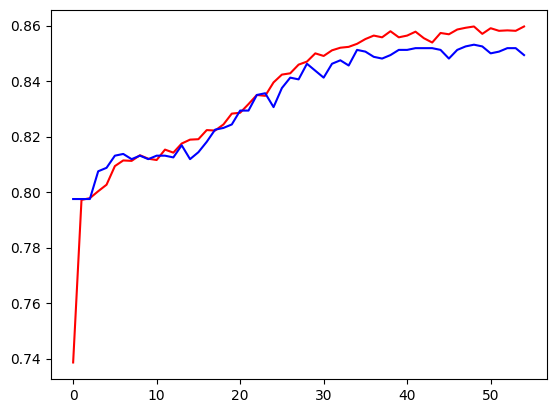

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

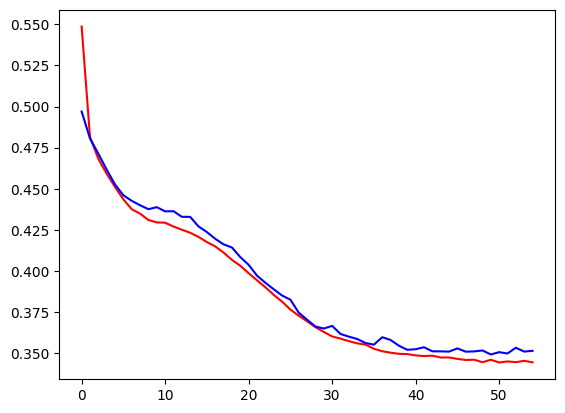

In [88]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')